In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

In [2]:
%matplotlib inline
plt.rcParams['figure.figsize'] = 10, 8
plt.style.use("seaborn")

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder


from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_validate

In [3]:
bi_df = pd.read_csv('../Model Data/final_multi_stonks_model_data.csv')
print(bi_df.dtypes)
bi_df.head()

Unnamed: 0       int64
Multi_Class     object
Search Date     object
MRNA_Open      float64
MRNA_Close     float64
                ...   
gig economy    float64
stimmy         float64
trump          float64
biden          float64
china          float64
Length: 106, dtype: object


,Unnamed: 0,Multi_Class,Search Date,MRNA_Open,MRNA_Close,MRNA_Difference,MRNA_Volume,JNJ_Open,JNJ_Close,JNJ_Difference,...,what is ivermectin,what is mrna,bill gates population control,ubereats,instacart jobs,gig economy,stimmy,trump,biden,china
0,0,1699-5000,2022-02-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1699-5000,2022-02-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,550-1698,2022-02-11,161.25,161.32,-0.07,5245700.0,169.12,167.71,1.41,...,18.0,44.0,0.0,55.0,18.0,4.0,0.0,2.0,4.0,26.0
3,3,0-549,2022-02-10,158.00,160.42,-2.42,5965400.0,171.21,169.42,1.79,...,20.0,34.0,11.0,45.0,8.0,2.0,0.0,2.0,5.0,28.0
4,4,0-549,2022-02-09,154.37,164.03,-9.66,5621600.0,172.07,171.49,0.58,...,21.0,44.0,5.0,33.0,17.0,3.0,0.0,2.0,7.0,27.0


In [4]:
bi_df = bi_df.drop(columns={'Unnamed: 0', 'Unnamed: 0.1', 'Search Date'})
bi_df = bi_df.dropna()
bi_df.head()

,Multi_Class,MRNA_Open,MRNA_Close,MRNA_Difference,MRNA_Volume,JNJ_Open,JNJ_Close,JNJ_Difference,JNJ_Volume,BTNX_Open,...,what is ivermectin,what is mrna,bill gates population control,ubereats,instacart jobs,gig economy,stimmy,trump,biden,china
2,550-1698,161.25,161.32,-0.07,5245700.0,169.12,167.71,1.41,13124800.0,167.93,...,18.0,44.0,0.0,55.0,18.0,4.0,0.0,2.0,4.0,26.0
3,0-549,158.00,160.42,-2.42,5965400.0,171.21,169.42,1.79,10355300.0,165.04,...,20.0,34.0,11.0,45.0,8.0,2.0,0.0,2.0,5.0,28.0
4,0-549,154.37,164.03,-9.66,5621600.0,172.07,171.49,0.58,5387500.0,162.90,...,21.0,44.0,5.0,33.0,17.0,3.0,0.0,2.0,7.0,27.0
5,1699-5000,155.20,153.31,1.89,7616400.0,171.02,171.51,-0.49,6296100.0,162.35,...,6.0,38.0,0.0,43.0,30.0,3.0,0.0,2.0,3.0,34.0
6,1699-5000,162.20,160.27,1.93,4429300.0,171.41,171.06,0.35,6065700.0,175.59,...,9.0,36.0,11.0,47.0,26.0,7.0,1.0,2.0,2.0,33.0


In [5]:
bi_df.select_dtypes(exclude=[np.number])

,Multi_Class,DJIA_Open,DJIA_Close,DJIA_Difference,DJIA_Volume
2,550-1698,"35,267.89","34,738.06",529.83,"398,860,000"
3,0-549,"35,630.81","35,241.59",389.22,"411,620,000"
4,0-549,"35,614.90","35,768.06",-153.16,"333,610,000"
5,1699-5000,"35,160.68","35,462.78",-302.1,"319,190,000"
6,1699-5000,"35,108.38","35,091.13",17.25,"328,910,000"
...,...,...,...,...,...
747,0-549,"25,865.08","26,024.96",-159.88,"351,780,000"
749,0-549,"23,437.34","23,475.82",-38.48,"352,880,000"
750,0-549,"19,028.36","18,591.93",436.43,"787,970,000"
751,0-549,"29,146.53","28,992.41",154.12,"311,210,000"


In [6]:
#change data types from str to numeric
bi_df['DJIA_Open'] = pd.to_numeric(bi_df['DJIA_Open'],
                                     errors = 'coerce')
bi_df['DJIA_Close'] = pd.to_numeric(bi_df['DJIA_Close'],
                                     errors = 'coerce')
bi_df['DJIA_Difference'] = pd.to_numeric(bi_df['DJIA_Difference'],
                                     errors = 'coerce')
bi_df['DJIA_Volume'] = pd.to_numeric(bi_df['DJIA_Volume'],
                                     errors = 'coerce')

In [7]:
bi_df.select_dtypes(exclude=[np.number])

,Multi_Class
2,550-1698
3,0-549
4,0-549
5,1699-5000
6,1699-5000
...,...
747,0-549
749,0-549
750,0-549
751,0-549


In [8]:
# bi_df = bi_df[bi_df.columns.drop(list(bi_df.filter(regex='Volume')))]
bi_df = bi_df[bi_df.columns.drop(list(bi_df.filter(regex='DJIA')))]


In [9]:
bi_df.select_dtypes(include=[np.number]).columns

Index(['MRNA_Open', 'MRNA_Close', 'MRNA_Difference', 'MRNA_Volume', 'JNJ_Open',
       'JNJ_Close', 'JNJ_Difference', 'JNJ_Volume', 'BTNX_Open', 'BTNX_Close',
       'BTNX_Difference', 'BTNX_Volume', 'PFE_Open', 'PFE_Close',
       'PFE_Difference', 'PFE_Volume', 'AZN_Open', 'AZN_Close',
       'AZN_Difference', 'AZN_Volume', ' NVAX_Open ', ' NVAX_Close ',
       'NVAX_Difference', 'NVAX_Volume', 'Total Doses Administered',
       'Daily Increase', 'Number of Flights',
       'Current Hospitalized COVID-19 Patients', 'alcoholism', 'anxiety',
       'athleisure', 'cutting hair', 'depression', 'dry cough', 'eczema',
       'fever', 'flu symptoms', 'lack of smell', 'lack of taste',
       'long-term care', 'mask mandates', 'obamacare', 'opiods', 'peloton',
       'quarantine', 'short-term disability', 'star trek', 'telehealth',
       'teslas', 'unemployment insurance', 'vaping', 'xanax', 'zoom',
       'covid symptoms', 'hospitals near me', 'baconator', 'helmet',
       'aluminium', 'pla

In [10]:
# bi_df = bi_df.dropna()
bi_df.select_dtypes(include=['float64'])

,MRNA_Open,MRNA_Close,MRNA_Difference,MRNA_Volume,JNJ_Open,JNJ_Close,JNJ_Difference,JNJ_Volume,BTNX_Open,BTNX_Close,...,what is ivermectin,what is mrna,bill gates population control,ubereats,instacart jobs,gig economy,stimmy,trump,biden,china
2,161.25,161.32,-0.07,5245700.0,169.12,167.71,1.41,13124800.0,167.93,170.95,...,18.0,44.0,0.0,55.0,18.0,4.0,0.0,2.0,4.0,26.0
3,158.00,160.42,-2.42,5965400.0,171.21,169.42,1.79,10355300.0,165.04,167.54,...,20.0,34.0,11.0,45.0,8.0,2.0,0.0,2.0,5.0,28.0
4,154.37,164.03,-9.66,5621600.0,172.07,171.49,0.58,5387500.0,162.90,173.33,...,21.0,44.0,5.0,33.0,17.0,3.0,0.0,2.0,7.0,27.0
5,155.20,153.31,1.89,7616400.0,171.02,171.51,-0.49,6296100.0,162.35,159.60,...,6.0,38.0,0.0,43.0,30.0,3.0,0.0,2.0,3.0,34.0
6,162.20,160.27,1.93,4429300.0,171.41,171.06,0.35,6065700.0,175.59,172.81,...,9.0,36.0,11.0,47.0,26.0,7.0,1.0,2.0,2.0,33.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
747,65.92,64.75,1.17,13586400.0,143.47,143.39,0.08,5285600.0,51.95,57.45,...,2.0,9.0,17.0,57.0,20.0,14.0,0.0,20.0,2.0,28.0
749,50.61,51.20,-0.59,11670100.0,152.81,152.99,-0.18,11515600.0,54.44,53.50,...,4.0,40.0,46.0,70.0,37.0,15.0,0.0,11.0,2.0,46.0
750,28.71,26.57,2.14,11080800.0,117.00,111.14,5.86,20815200.0,59.00,51.31,...,3.0,23.0,11.0,86.0,32.0,13.0,0.0,16.0,2.0,73.0
751,18.47,18.23,0.24,3651100.0,148.09,149.93,-1.84,7776800.0,31.80,32.35,...,0.0,27.0,4.0,44.0,11.0,12.0,0.0,10.0,1.0,32.0


In [11]:
X = bi_df.drop(columns=['Multi_Class'])
y = bi_df['Multi_Class']
# target_names = ["High", "Low"]

In [12]:
y_label = LabelEncoder().fit_transform(y)
y_label

array([2, 0, 0, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 2, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 2, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 2, 1, 1, 1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 1, 1, 1, 2, 2, 2, 1, 2, 1, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 2, 2, 0, 2, 2, 2, 2, 0, 0, 2, 2, 0, 0, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 1, 1, 2, 0,
       2, 1, 2, 2, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

# Data Modeling

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y_label, random_state=42)

In [14]:
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [15]:
rfc = RandomForestClassifier(random_state=1, n_estimators=500).fit(X_train_scaled, y_train)
print(f'Training Score: {rfc.score(X_train_scaled, y_train)}')
print(f'Testing Score: {rfc.score(X_test_scaled, y_test)}')

Training Score: 1.0
Testing Score: 0.5396825396825397


In [16]:
feature_importances = rfc.feature_importances_

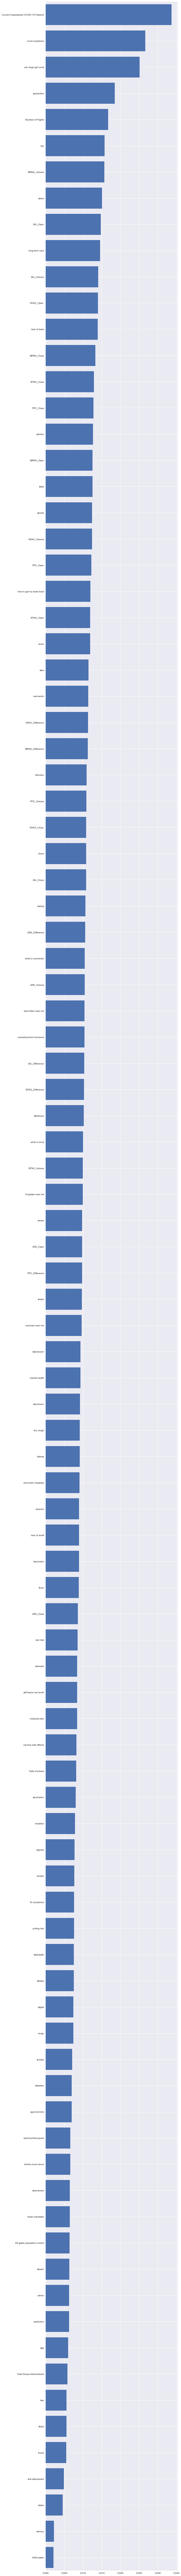

In [17]:
features = sorted(zip(X.columns, rfc.feature_importances_), key = lambda x: x[1])
cols = [f[0] for f in features]
width = [f[1] for f in features]

fig, ax = plt.subplots()

fig.set_size_inches(10,200)
plt.margins(y=0.001)

ax.barh(y=cols, width=width)

plt.show()

<AxesSubplot:>

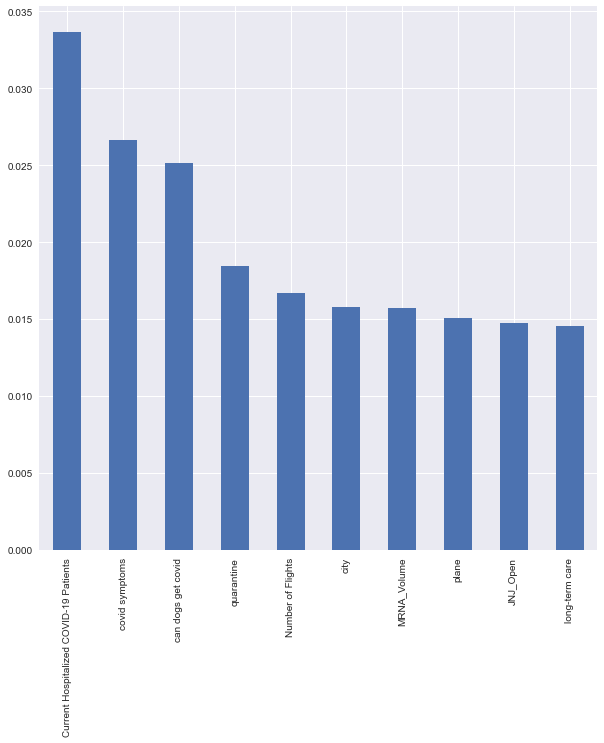

In [18]:
feat_plot=pd.Series(rfc.feature_importances_, index=X_train.columns).nlargest(10).sort_values(ascending=False)[:200].plot(kind='bar', figsize=(10,10))
feat_plot